In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import scipy

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/house-prices-advanced-regression-techniques/modifiedTrain.csv')
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice.1,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,0.0,0.090909,0.50,0.666667,0.75,0.581431,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,0.0,0.363636,0.25,0.666667,0.75,0.536319,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,0.0,0.727273,0.50,0.666667,0.75,0.604029,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,0.0,0.090909,0.00,0.666667,0.00,0.451871,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,0.0,1.000000,0.50,0.666667,0.75,0.640477,0.0,0.0,0.0


## Feature Selection

In [3]:
y = df[['SalePrice']]
x = df.drop(['Id','SalePrice.1','SalePrice'],axis=1)

In [4]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=100)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=100))

In [5]:
##Let's check the recommended features here

feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [6]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 21
features with coefficients shrank to zero: 61


In [7]:
x[selected_feat].head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,...,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,...,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,...,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,...,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,...,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 44)
xtrain.shape

(1168, 82)

## RandomForest Model

In [9]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [10]:
ypreds = rf.predict(xtest)

In [11]:
print(cross_val_score(rf, xtest, ytest, scoring='neg_mean_squared_error', cv=5))

[-0.0255066  -0.02524862 -0.03598731 -0.03459947 -0.01906847]


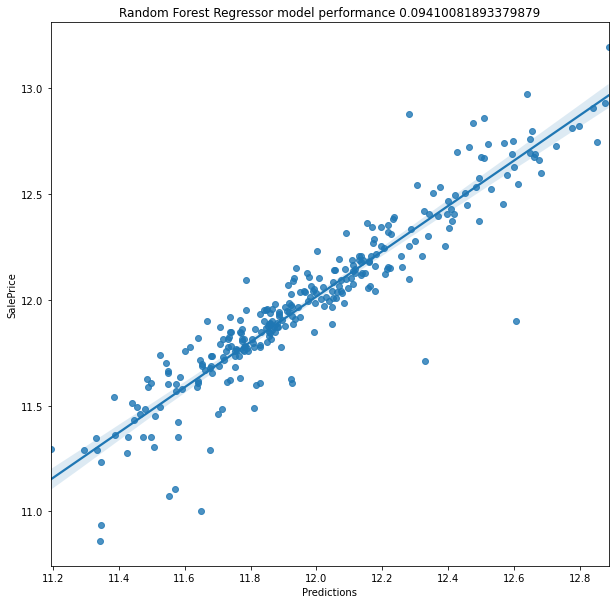

In [19]:
mae = sklearn.metrics.mean_absolute_error(ytest, ypreds)
r2_score = sklearn.metrics.r2_score(ytest, ypreds)

plt.figure(figsize=(10,10))
sns.regplot(ypreds, ytest)
plt.xlabel('Predictions')
plt.title('Random Forest Regressor model performance {}'.format(mae))
plt.show()

In [20]:
print(r2_score)

0.8677216213210094
